## Python problem I2A2
A famous casino suddenly faces a huge decline in its revenue. So the casino decides to offer
a new Poker online version. Can you help them write an algorithm to ranking the Poker
hands?

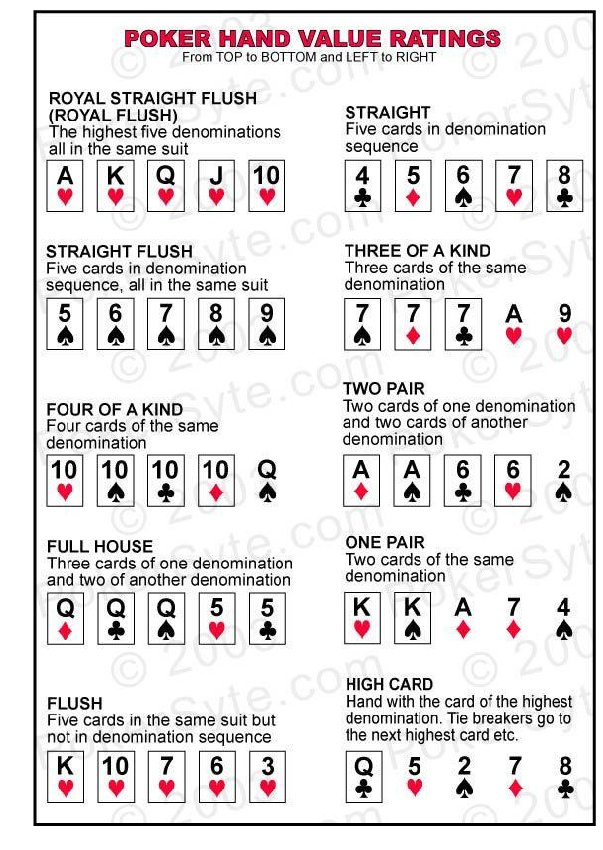

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = [30,15]
plt.imshow(plt.imread('../images/ranks.png'))
plt.axis('off')
plt.show()

## Description of the solution:
We rank the poker hand in 9 values:
+ 8: Straight Flush
+ 7: Four of a kind
+ 6: Full house
+ 5: Flush
+ 4: Straight
+ 3: Three of a kind
+ 2: Two pair
+ 1: One pair
+ 0: High card

For all the cases I return the (rank,[max value of the card in the group of importance],values) in order to compare when the cards have the same rank. In this case, I take in count if two hands have the same rank, i will check the max value of the card in the group of importance and then the rest of the cards (e.g. In Three of  a kinf I consider first the max value of the three importan cards and then i consider the rest of the cards). In the case of 2 pair I have a similar logic.

In [10]:
import itertools
import numpy as np

class PokerHand:
    def __init__(self,hand):
        self.check_size(hand) #Validation of the size of the poker hand
        self.check_hand(hand) # validation of the right format of the card
        self.transform_to_numeric(hand) #Transform the string into card values 
        
    def check_size(self,hand):
        #Method to check the size of the card hand
        if(len(hand.split())!=5):
            raise Exception("Incorrect number's cars: %s, expected 5 cards" % len(hand.split()))
    
    def check_card(self,card):  
        return card[0] in self.one and card[1] in self.two      
    
    def check_hand(self,hand):
        #Method to detect if the value and symbol of the card are correct
        self.one  = [str(i) for i in range(2,10)]+['T','J','Q','K','A']
        self.two = ['S','H','D','C']
        for card in hand.split():
            if(not self.check_card(card)):
                raise Exception(' Incorrect format of car : %s' % (card))
                
    def transform_to_numeric(self,hand):
        #Method to transform the poker hand into numeric and simbols values
        value_dict = {'T': 10, 'J': 11, 'Q': 12, 'K': 13, 'A': 14}
        value_dict.update((str(x), x) for x in range(2,10))
        self.hand=hand.split()
        self.hand=sorted([(value_dict[r],s) for r,s in self.hand],reverse=True)
        self.values = sorted([c[0] for c in self.hand], reverse=True)  
    
    def get_rank(self):
        #Method to get the rank of the hand      
        #Get the symbols of the poker hand
        suits = [c[1] for c in self.hand]
        #Evalute Flush,straight and  Straight Flush
        flush = len(set(suits)) == 1
        #Considering the case A,2,3,4,5 as possible straight Flush
        straight = (((max(self.values )-min(self.values ))==4) or  self.values == [14, 5, 4, 3, 2]) and len(set(self.values))==5
        # Straight and fLush
        if straight and flush:
            return [(8,[max(self.values )],self.values )if (self.values !=[14, 5, 4, 3, 2] ) else (8,5,self.values)][0]
        elif flush: return (5,[max(self.values)],self.values) #Flush
        elif straight: return (4,[max(self.values)],self.values) #Straight
        trips = []
        pairs = []
        for v, group in itertools.groupby(self.values):
            count = sum(1 for _ in group)
            if count == 4: 
                return (7, [v], self.values) #Four of a kind
            elif count == 3: trips.append(v)
            elif count == 2: pairs.append(v)
        if trips:
            if pairs:
                return(6,[max(trips)],self.values) #Full house
            else:
                return(3,[max(trips)],self.values) # Three of a kind
        elif len(pairs)==1:
            return(len(pairs),[max(pairs)],self.values) #One pair
        elif len(pairs)==2:
            return(len(pairs),pairs,self.values) #Two pairs
        else:
            return(0,[max(self.values)],self.values) #High card
    def max_vector(self,a,b):
        #Method for detect the wich vector of cards is the greatest
        a=np.array(sorted(a,reverse=True))
        b=np.array(sorted(b,reverse=True))
        c=a-b
        for i in c:
            if i>0:
                return 'WIN'
            elif i<0:
                return 'LOSS'
        return 'NONE'
    
    def compare_with(self,hand2):
        #Method for comparing the two poker hands
        a=self.get_rank()
        b=hand2.get_rank()
        if a[0]!=b[0]:
            return ['WIN' if (a[0]>b[0]) else 'LOSS'][0]
        elif a[0]!=2:
            if a[1]!=b[1]:
                return ['WIN' if (a[1]>b[1]) else 'LOSS'][0]
            else:
                set_val_a=list(set(a[2])-set(a[1]))
                set_val_b=list(set(b[2])-set(b[1]))
                return self.max_vector(set_val_a,set_val_b)
        else:
            #a[0]==2,(len(pairs),pairs,values) 
            if self.max_vector(a[1],b[1])=='NONE':
                one_a=list(set(a[2])-set(a[1]))[0]
                one_b=list(set(b[2])-set(b[1]))[0]
                return ['WIN' if one_a>one_b else 'LOSS'][0]
            else: 
                return self.max_vector(a[1],b[1])

In [16]:
#Case of two pair with the same rank
hand1=PokerHand("TC TH 5C 5H KH")
hand2=PokerHand("TS TD 5S 5D AH")
print('Two pair with same rank: ',hand1.compare_with(hand2))
hand1=PokerHand("5S 6S 7S 8S 9S")
hand2=PokerHand("4D 5D 6D 7D 8D")
print('Straight Flush with same rank: ',hand1.compare_with(hand2))


Two pair with same rank LOSS
Straight Flush with same rank WIN


In [8]:
import unittest

class Results:
    def __init__(self):
        self.WIN = 'WIN'
        self.LOSS = 'LOSS'
        
class TestPokerHand(unittest.TestCase):
    def test(self):
        results = Results()
        self.assertTrue(PokerHand("TC TH 5C 5H KH").compare_with(PokerHand("9C 9H 5C 5H AC")) == results.WIN)
        self.assertTrue(PokerHand("TS TD KC JC 7C").compare_with(PokerHand("JS JC AS KC TD")) == results.LOSS)
        self.assertTrue(PokerHand("7H 7C QC JS TS").compare_with(PokerHand("7D 7C JS TS 6D")) == results.WIN)
        self.assertTrue(PokerHand("5S 5D 8C 7S 6H").compare_with(PokerHand("7D 7S 5S 5D JS")) == results.LOSS)
        self.assertTrue(PokerHand("AS AD KD 7C 3D").compare_with(PokerHand("AD AH KD 7C 4S")) == results.LOSS)
        self.assertTrue(PokerHand("TS JS QS KS AS").compare_with(PokerHand("AC AH AS AS KS")) == results.WIN)
        self.assertTrue(PokerHand("TS JS QS KS AS").compare_with(PokerHand("TC JS QC KS AC")) == results.WIN)
        self.assertTrue(PokerHand("TS JS QS KS AS").compare_with(PokerHand("QH QS QC AS 8H")) == results.WIN)
        self.assertTrue(PokerHand("AC AH AS AS KS").compare_with(PokerHand("TC JS QC KS AC")) == results.WIN)
        self.assertTrue(PokerHand("AC AH AS AS KS").compare_with(PokerHand("QH QS QC AS 8H")) == results.WIN)
        self.assertTrue(PokerHand("TC JS QC KS AC").compare_with(PokerHand("QH QS QC AS 8H")) == results.WIN)
        self.assertTrue(PokerHand("7H 8H 9H TH JH").compare_with(PokerHand("JH JC JS JD TH")) == results.WIN)
        self.assertTrue(PokerHand("7H 8H 9H TH JH").compare_with(PokerHand("4H 5H 9H TH JH")) == results.WIN)
        self.assertTrue(PokerHand("7H 8H 9H TH JH").compare_with(PokerHand("7C 8S 9H TH JH")) == results.WIN)
        self.assertTrue(PokerHand("7H 8H 9H TH JH").compare_with(PokerHand("TS TH TD JH JD")) == results.WIN)
        self.assertTrue(PokerHand("7H 8H 9H TH JH").compare_with(PokerHand("JH JD TH TC 4C")) == results.WIN)
        self.assertTrue(PokerHand("JH JC JS JD TH").compare_with(PokerHand("4H 5H 9H TH JH")) == results.WIN)




In [9]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK
